# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Wickly Gusthvi
- Email: wicklyjr@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren rata-rata peminjaman sepeda harian dalam satu bulan?
- Apakah suhu (temperature) memiliki pengaruh terhadap jumlah peminjam sepeda?
- Apakah ada pola peminjaman sepeda yang berkaitan dengan cuaca?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')

### Assessing Data

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
data.duplicated().sum()

0

*Tidak terdapat data duplikat*

### Cleaning data

In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*Tidak terdapat missing values*

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Mengelompokkan data berdasarkan tahun (yr), bulan (mnth), dan menghitung rata-rata peminjaman sepeda (cnt)
avg_daily_rentals_monthly = data.groupby(['yr', 'mnth'])['cnt'].mean()

# Menampilkan jumlah rata-rata peminjaman sepeda harian dalam satu bulan di tahun 2011
avg_daily_rentals_2011 = avg_daily_rentals_monthly.loc[0]  # Tahun 2011

# Menampilkan jumlah rata-rata peminjaman sepeda harian dalam satu bulan di tahun 2012
avg_daily_rentals_2012 = avg_daily_rentals_monthly.loc[1]  # Tahun 2012

print("Jumlah rata-rata peminjaman sepeda harian dalam satu bulan di tahun 2011:")
print(avg_daily_rentals_2011)
print("\nJumlah rata-rata peminjaman sepeda harian dalam satu bulan di tahun 2012:")
print(avg_daily_rentals_2012)

Jumlah rata-rata peminjaman sepeda harian dalam satu bulan di tahun 2011:
mnth
1     1231.903226
2     1721.964286
3     2065.967742
4     3162.333333
5     4381.322581
6     4783.733333
7     4559.387097
8     4409.387097
9     4247.266667
10    3984.225806
11    3405.566667
12    2816.870968
Name: cnt, dtype: float64

Jumlah rata-rata peminjaman sepeda harian dalam satu bulan di tahun 2012:
mnth
1     3120.774194
2     3556.448276
3     5318.548387
4     5807.466667
5     6318.225806
6     6761.000000
7     6567.967742
8     6919.451613
9     7285.766667
10    6414.225806
11    5088.800000
12    3990.741935
Name: cnt, dtype: float64


In [ ]:
# Mengubah nilai weathersit menjadi label yang sesuai
weather_labels = {
    1: "Clear/Few clouds/Partly cloudy",
    2: "Mist/Cloudy/Broken clouds/Few clouds",
    3: "Light Snow/Light Rain/Thunderstorm/Scattered clouds",
    4: "Heavy Rain/Ice Pallets/Thunderstorm/Mist/Snow/Fog"
}
data['weather_label'] = data['weathersit'].map(weather_labels)

# Mengelompokkan data berdasarkan weather_label dan menghitung jumlah peminjaman sepeda (cnt)
rentals_by_weather = data.groupby('weather_label')['cnt'].sum()

print(rentals_by_weather)

weather_label
Clear/Few clouds/Partly cloudy                         2257952
Light Snow/Light Rain/Thunderstorm/Scattered clouds      37869
Mist/Cloudy/Broken clouds/Few clouds                    996858
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren rata-rata peminjaman sepeda harian dalam satu bulan

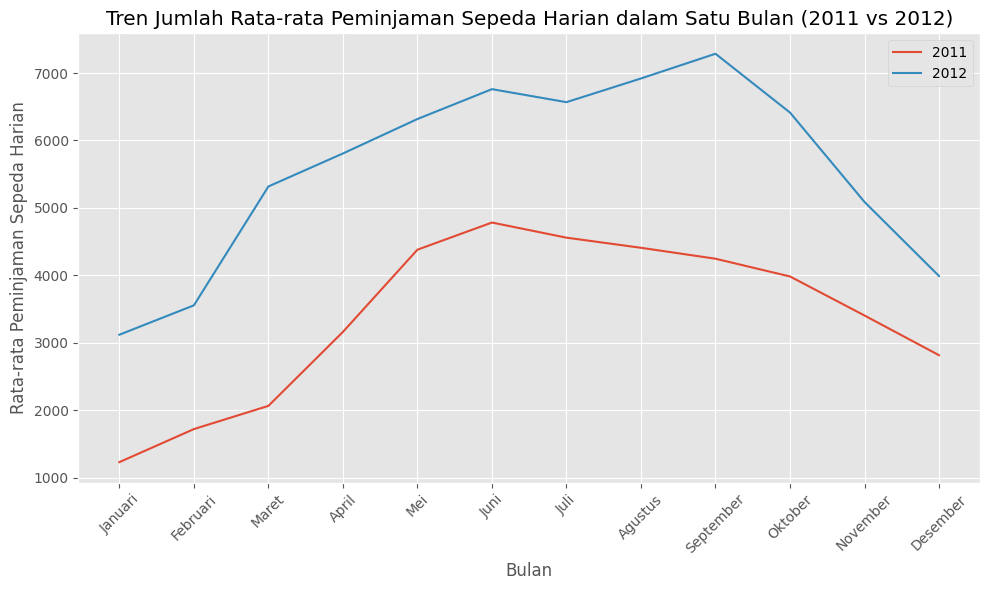

In [ ]:
month_labels = ["Januari","Februari","Maret","April","Mei", "Juni","Juli","Agustus","September","Oktober","November","Desember"]

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(month_labels, avg_daily_rentals_2011, label='2011')
plt.plot(month_labels, avg_daily_rentals_2012, label='2012')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Peminjaman Sepeda Harian')
plt.title('Tren Jumlah Rata-rata Peminjaman Sepeda Harian dalam Satu Bulan (2011 vs 2012)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pengaruh suhu (temperature) terhadap jumlah peminjam sepeda?

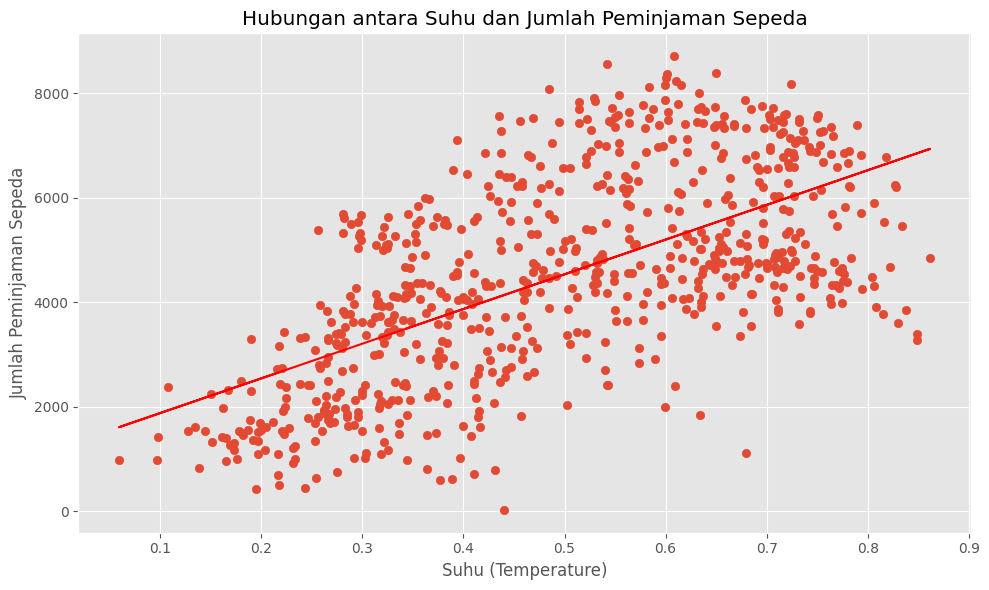

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.scatter(data['temp'], data['cnt'])
plt.xlabel('Suhu (Temperature)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')

# Menambahkan garis linier menggunakan regresi linier
fit = np.polyfit(data['temp'],data['cnt'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data['temp'], fit_fn(data['temp']), color='red')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Apakah ada pola peminjaman sepeda yang berkaitan dengan cuaca?

In [ ]:
def plot_pie_charts(x, y, title):
    c = ['green', 'red','blue']
    plt.figure(figsize=(10,8))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, autopct='%1.1f%%', startangle=90)
    plt.legend(x, loc='best', fontsize=8)
    plt.show()

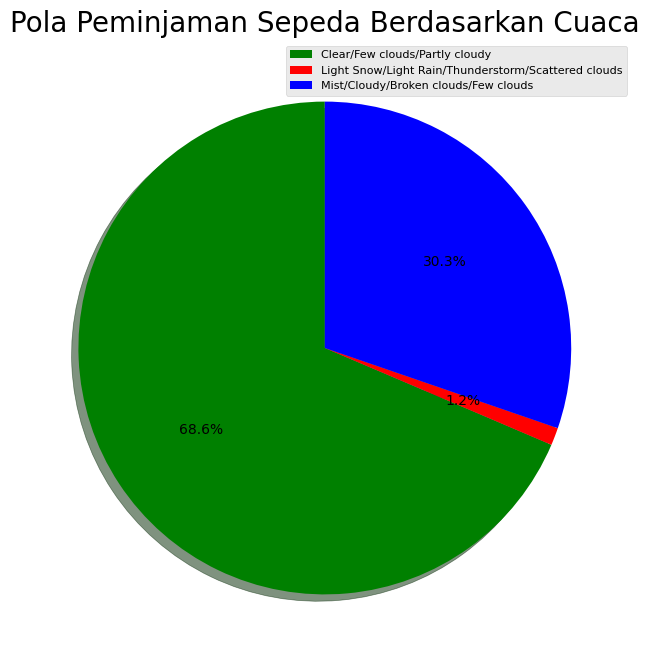

In [ ]:
plot_pie_charts(rentals_by_weather.index,rentals_by_weather, 'Pola Peminjaman Sepeda Berdasarkan Cuaca')

## Kesimpulan

1. Terlihat bahwa jumlah rata-rata peminjaman sepeda harian cenderung meningkat dari awal tahun hingga mencapai puncaknya pada bulan Mei, dan kemudian menurun menjelang akhir tahun. Hal ini terjadi baik pada tahun 2011 maupun 2012. Namun, **terdapat peningkatan yang lebih signifikan pada tahun 2012 dibandingkan dengan tahun 2011.**

2. Terlihat pada grafik scatter plot, terdapat **hubungan positif antara Suhu dan Jumlah Peminjam Sepeda.**  Hal ini dapat dilihat dari kecenderungan naiknya garis linier yang menunjukkan bahwa semakin tinggi suhu, semakin tinggi juga jumlah peminjaman sepeda. Pola ini dapat diinterpretasikan bahwa suhu yang lebih hangat cenderung meningkatkan minat orang untuk menggunakan sepeda. Pada suhu yang lebih tinggi, orang mungkin lebih terdorong untuk melakukan kegiatan di luar ruangan, termasuk bersepeda. Sebaliknya, pada suhu yang lebih rendah, minat untuk menggunakan sepeda cenderung menurun.

3. Terlihat bahwa kondisi cuaca `Clear/Few clouds/Partly cloudy` memiliki jumlah peminjaman sepeda yang jauh lebih tinggi dibandingkan dengan kondisi cuaca lainnya. Sementara itu, kondisi cuaca `Light Snow/Light Rain/Thunderstorm/Scattered clouds` memiliki jumlah peminjaman sepeda yang lebih rendah. Kondisi cuaca `Mist/Cloudy/Broken clouds/Few clouds` berada di antara kedua kondisi cuaca tersebut. **Hal ini menunjukkan adanya pengaruh cuaca terhadap pola peminjaman sepeda.** Cuaca yang cerah dan sedikit berawan cenderung meningkatkan minat orang untuk meminjam sepeda, sedangkan cuaca yang berkaitan dengan salju, hujan ringan, petir, awan tersebar, dan kabut cenderung memiliki pengaruh yang lebih rendah.